<a href="https://colab.research.google.com/github/vcfq/Competencia-y-Regulaci-n/blob/main/Pregunta1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pregunta 1

In [7]:
import pandas as pd

url_base1 = 'https://raw.githubusercontent.com/vcfq/Competencia-y-Regulaci-n/main/base1.xlsx'
url_base2 = 'https://raw.githubusercontent.com/vcfq/Competencia-y-Regulaci-n/main/base2.xlsx'

df_1 = pd.read_excel(url_base1)
df_2 = pd.read_excel(url_base2)

--------
Estadística Descriptiva
--------

Resumen por prestador:
    prestador  precio  infraestructura  puntaje_doctor  tecnologia_alta  \
0  Clinica_A   11.57             8.03            9.01             0.60   
1  Clinica_B    9.97             7.04            7.51             0.26   
2  Clinica_C    9.00             6.02            6.06             0.00   
3    Publico   10.11             5.48            8.06             0.05   

   num_operados  
0       2084342  
1       1038417  
2        569013  
3        667026  


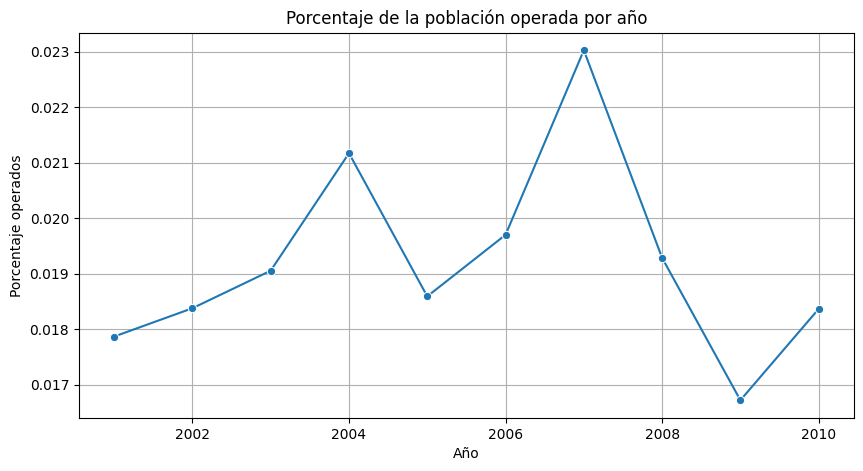

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = df_1.merge(df_2, on="ciudad")
df["poblacion_total"] = df["poblacion_inicial"] * (1 + df["crecimiento_anual"]) ** (df["year"] - 2001)
df["porcentaje_operados"] = df["num_operados"] / df["poblacion_total"]

# Tabla resumen por prestador
resumen = df.groupby("prestador").agg({
    "precio": "mean",
    "infraestructura": "mean",
    "puntaje_doctor": "mean",
    "tecnologia_alta": "mean",
    "num_operados": "sum"
}).round(2).reset_index()
print("Resumen por prestador:\n", resumen)

# Evolución total
evolucion = df.groupby("year").agg({
    "num_operados": "sum",
    "poblacion_total": "sum"
}).reset_index()
evolucion["porcentaje_operados"] = evolucion["num_operados"] / evolucion["poblacion_total"]

# Gráfico
plt.figure(figsize=(10, 5))
sns.lineplot(data=evolucion, x="year", y="porcentaje_operados", marker="o")
plt.title("Porcentaje de la población operada por año")
plt.ylabel("Porcentaje operados")
plt.xlabel("Año")
plt.grid(True)
plt.savefig("evolucion_operaciones.pdf", format="pdf")
plt.show()

latex_output = resumen.to_latex(index=False, caption="Estadísticas descriptivas por prestador", label="tab:resumen_prestadores")
with open("resumen_prestadores.tex", "w") as f:
    f.write(latex_output)

from google.colab import files
files.download("resumen_prestadores.tex")
files.download("evolucion_operaciones.pdf")

